## Image Generation

### Stability AI Image Generation with Boto3

In [27]:
import boto3

bedrock_runtime = boto3.client(region_name='us-east-1', service_name='bedrock-runtime')

In [28]:
#pos_prompt = "A photorealistic picture of an apple"
#neg_prompt = "ugly, blurry, out of focus"

pos_prompt = "A photorealistic picture of an apple, HD photography, lens flare"
neg_prompt = "ugly, blurry, out of focus, painting, drawing"

In [29]:
import json

In [30]:
parameters = {'text_prompts': [{'text': pos_prompt, 'weight':1}, 
                               {'text': neg_prompt, 'weight': -1}],
             'cfg_scale': 35, 'seed': 0, 'samples': 1}

In [31]:
request_body = json.dumps(parameters)

In [32]:
response = bedrock_runtime.invoke_model(body=request_body, modelId='stability.stable-diffusion-xl-v1')

In [33]:
response_body = json.loads(response.get('body').read())

In [34]:
#response_body

In [35]:
import base64

In [36]:
from PIL import Image

In [37]:
base64_image_data = base64.b64decode(response_body['artifacts'][0]['base64'])

In [38]:
file_path = 'myapple.png'
with open(file_path, 'wb') as file:
    file.write(base64_image_data)

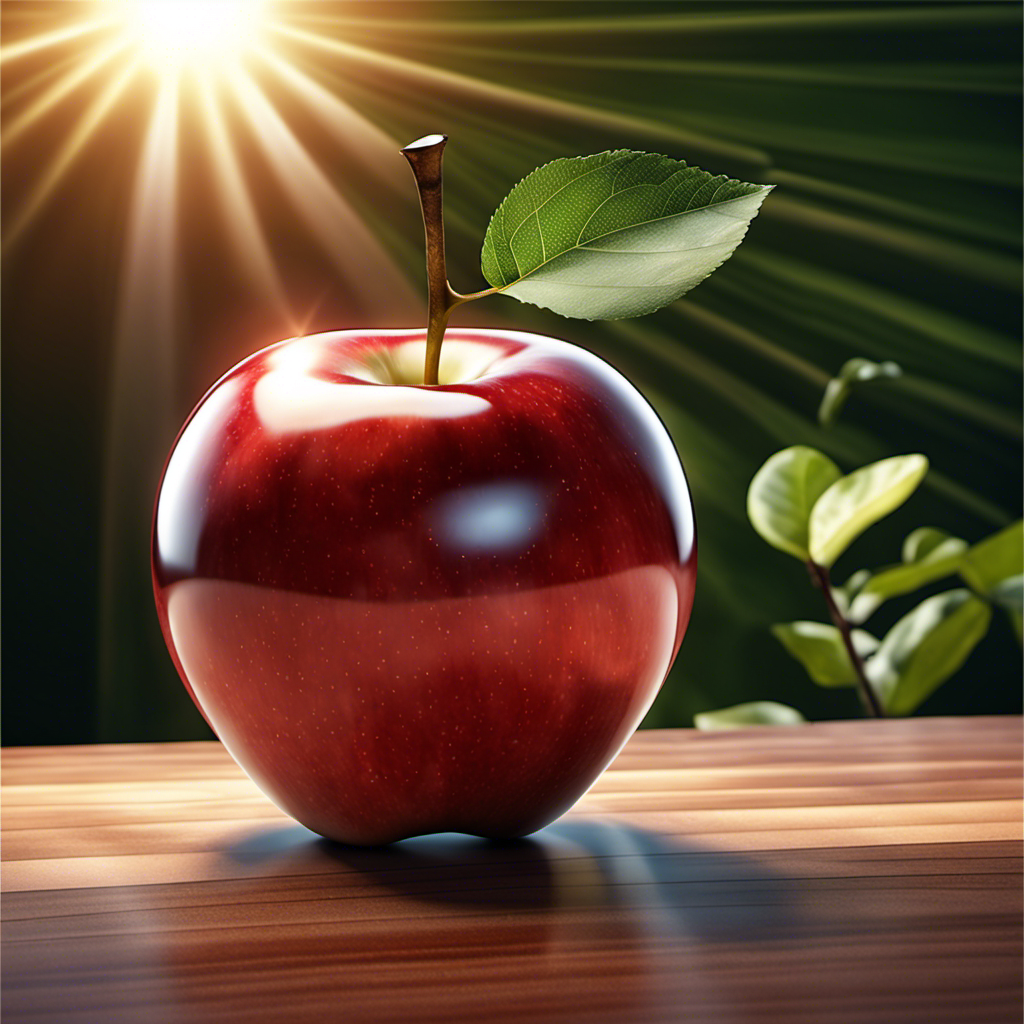

In [39]:
Image.open('myapple.png')